In [ ]:
# https://github.com/Qiskit/qiskit-tutorials

In [9]:
#from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, quantum_info, execute, transpile, assemble, IBMQ
#from qiskit.circuit import Gate
#from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
#from qiskit.quantum_info import Statevector,random_statevector
#from qiskit.extensions import Initialize
#from qiskit.tools.monitor import job_monitor
#from qiskit.visualization import array_to_latex
#from qiskit.providers.ibmq import least_busy

from qiskit import *
from qiskit.visualization import *
from qiskit.quantum_info import *
from qiskit.extensions import *
from qiskit.tools.monitor import *
from qiskit.providers.ibmq import *
from qiskit.circuit import *

import numpy as np
import matplotlib as mpl

from ipywidgets import interactive
from IPython.core.display import display

#%config InlineBackend.figure_format = 'retina' #si tenéis pantalla retina (creo que más de 144ppp)las figuras salen
#con mejor definición con este comando. Si no teneis, usad el comando de abajo pero va a cambiar el tamaño de todo.
mpl.rcParams['figure.dpi'] = 50 

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Jan 18 09:15:21 2022

@author: xowy
"""
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex


##############################################################################
# Definimos funciones auxiliares para printear

def MatrixToLatex(A):
    a = "\\begin{pmatrix}"
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            if ((j+1) % A.shape[1]) == 0:
                a = a+"{0:.2f}".format(A[i, j])
            else:
                a = a+"%s&" % "{0:.2f}".format(A[i, j])
        if ((i+1) % A.shape[0]) != 0:
            a = a+"\\\\"
    a = a+"\\end{pmatrix}"
    return(a)


def Display(string):
    display(Markdown(string))

### IBM #1 

In [3]:
#Guardamos nuestra cuenta en el disco duro usando el API token
IBMQ.save_account('690f441b74197a4d72968214bf5d7c446e999c114dcf7247f821a9604c4ac2d1136815105e210fc44485bd885148d815e441135c43f7bc7668195a5911f6cb01', overwrite=True)
#Cargamos nuestra cuenta
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [4]:
#Especificamos nuestro proveedor de backends
provider = IBMQ.get_provider(hub = 'ibm-q')

#Así podemos ver qué QCs están disponibles
backends = provider.backends()
backends

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>]

### IBM #2

In [5]:
#provider = IBMQ.load_account()
#backend_overview()

# Circuitos

## Definir un circuito

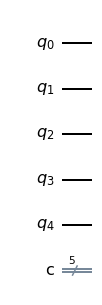

In [6]:
#FORMA 1
n=5
m=5
qubits = QuantumRegister(n,name='q')
bits = ClassicalRegister(m,name='c')
qc = QuantumCircuit(qubits,bits)
qc.draw('mpl')

<div class="alert alert-block alert-info">    
#OJO estamos definiendo n qubits (de 0 a n-1) y m bits (de 0 a m-1)
    
#OJO los índices van de 0 a n-1, 0 a m-1 en la programación
    
#En el circuito los índices del registro figuran de 1 a n y 1 a m, respectivamente.
<div>

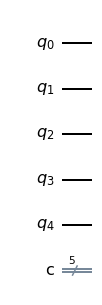

In [7]:
#FORMA 2
qc = QuantumCircuit(n,m)

#Dibujamos el circuito
qc.draw('mpl')

## Puertas cuánticas

### Puertas elementales

Parameter(θ)

In [36]:
qcc = QuantumCircuit(2)
qcc.swap(0,1)
qcc.draw('mpl').savefig('swap_gate.pdf') 

In [12]:
qcc.draw('latex_source', filename='./file.tex')

'\\documentclass[border=2px]{standalone}\n\n\\usepackage[braket, qm]{qcircuit}\n\\usepackage{graphicx}\n\n\\begin{document}\n\\scalebox{1.0}{\n\\Qcircuit @C=1.0em @R=0.8em @!R { \\\\\n\t \t\\nghost{{q}_{0} :  } & \\lstick{{q}_{0} :  } & \\ctrl{1} & \\qw & \\qw\\\\\n\t \t\\nghost{{q}_{1} :  } & \\lstick{{q}_{1} :  } & \\targ & \\qw & \\qw\\\\\n\\\\ }}\n\\end{document}'

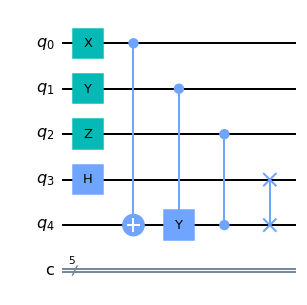

In [8]:
#Puertas básicas
qc.x(0)
qc.y(1)
qc.z(2)
qc.h(3)

#Puertas controladas
qc.cx(0,4)
qc.cy(1,4)
qc.cz(2,4)
qc.swap(3,4)
qc.draw('mpl')

# Obtener matriz unitaria de la totalidad de un circuito 

## Obtener matriz unitaria del circuito (sin puertas CH)

In [ ]:
#Obtener matriz del circuito; i.e., operador unitario total
usim = Aer.get_backend('unitary_simulator')
unitary = usim.run(qc).result().get_unitary()  
array_to_latex(unitary, prefix="\\text{Resultado = }\n")

## Simular y obtener operador unitario

In [ ]:
#Necesitamos ejecutar el circuito para obtener la matriz
backend = Aer.get_backend('unitary_simulator')
job = execute(qc,backend)
#pd.set_option('display.max_columns', None)
result = job.result()

#print(np.round(result.get_unitary(qc),4))
#type(np.round(result.get_unitary(qc),4))

with np.printoptions(threshold=np.inf):
    print(np.round(result.get_unitary(qc),4))

## Función statevector para obtener resultado final del circuito

In [ ]:
Statevector(qc)

### Alternativamente 

In [ ]:
backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend)
state = job.result().get_statevector()

for i in range(2**n):
    s = format(i,"b") # Convert to binary
    s = (n-len(s))*"0"+s # Prepend zeroes if needed
    print("Amplitude of",s,"=",state[i])

for i in range(2**n):
    s = format(i,"b") # Convert to binary
    s = (n-len(s))*"0"+s # Prepend zeroes if needed
    print("Probability of",s,"=",abs(state[i])**2)


### Conteo de resultados

In [ ]:
 #Escoger aparato de medida
backend = Aer.get_backend('qasm_simulator')

#Ejecutar medida
job = execute(qc, backend)

#Extraer resultado de la medida
result = job.result()

#Realizar conteo y mostrarlo
counts = result.get_counts()
display(counts)

#Graficar conteo en histograma
graph = plot_histogram(counts)
display(graph)

### Puertas II

In [ ]:
#Puerta CH
qc.ch(3,4)

#Puerta multicontroladas
qc.ccx(0,1,2)

qc.draw('mpl')

### Puerta U3

$$
C U(\theta, \phi, \lambda, \gamma)=I \otimes |0\rangle \langle  0| + e^{i \gamma} U(\theta, \phi, \lambda) \otimes | 1 \rangle \langle 1|=\left(\begin{array}{cccc}
1 & 0 & 0 & 0 \\
0 & e^{i \gamma} \cos \left(\frac{\theta}{2}\right) & 0 & -e^{i(\gamma+\lambda)} \sin \left(\frac{\theta}{2}\right) \\
0 & 0 & 1 & 0 \\
0 & e^{i(\gamma+\phi)} \sin \left(\frac{\theta}{2}\right) & 0 & e^{i(\gamma+\phi+\lambda)} \cos \left(\frac{\theta}{2}\right)
\end{array}\right)
$$

Es díficil, así de primeras, ver el efecto que esta matriz va a tener, así que usamos el qasm simulator. Un caso más sencillo es el que aparece comentado en el que la puerta controlada es una $\operatorname{Z}$. Como el estado entrante es $|a\rangle = |0\rangle$ tendremos, con propabilidad del 100%, el estado $|0\rangle$.


Podemos probar también a montar este circuito (o cualquier otro) de una forma muy visual empleando el [Composer](https://quantum-computing.ibm.com/composer/files/new) de IBM. 

## Medida en un circuito

In [ ]:
#Añadir medida al circuito en todos los canales
#qc.measure(range(n),range(n))

#Alternativamente, podemos medir con:
#qc.measure([0,n]],[0,n])

#OTRA OPCION: qc.measure_all()

#Medir qubit i en bit j
import random
i=random.randint(0, n-1)
print('i =',i)
j=random.randint(0,m-1)
print('j =',j)
qc.measure(qubits[4],bits[0])



#NOTAR QUE MEDIMOS EN Z
qc.draw('mpl')

### Medida en X

In [ ]:
#MEDIDA EN X
qcx = QuantumCircuit(1,1)

qcx.h(0)
qcx.measure(0,0)
qcx.draw(output='mpl')

### Medida en Y

In [ ]:
#MEDIDA EN Y
qcy = QuantumCircuit(1,1)

qcy.h(0)
qcy.s(0)
qcy.measure(0,0)
qcy.draw(output='mpl')

### Medida de Hadamard (1 qubit)

Sea $U$ un operador UNITARIO y HERMITICO. La medida de Hadamard permite conocer el valor esperado sin medir directamente sobre el estado.
<center><img src="Imagenes_repaso/hadamard_test.png" width='400' height='250'/><center>

$$
\begin{aligned}
&|0a\rangle \rightarrow \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)\otimes|a\rangle \rightarrow \frac{1}{\sqrt{2}}(|0a\rangle+|1\rangle\otimes U |a\rangle)\rightarrow \\
&\rightarrow \frac{1}{2}(|0\rangle+|1\rangle)\otimes|a\rangle + \frac{1}{2}(|0\rangle-|1\rangle)\otimes U|a\rangle = \\
&=\frac{1}{2} |0\rangle \otimes (|a\rangle + U |a\rangle) + \frac{1}{2} |1\rangle \otimes (|a\rangle - U |a\rangle)
\end{aligned}
$$   
Ahora, el circuito proyecta con $P_{0}=|0\rangle \langle0| \otimes I$ y $P_{1}=|1\rangle \langle1| \otimes I$, de forma que:
    
$$  
\langle P_{0} \rangle =  \left \| \frac{1}{2} |0\rangle \otimes (|a\rangle + U |a\rangle) \right \|^{2}=\frac{1}{4}(\langle a|a\rangle + \langle a|U|a\rangle + \langle a|U^{\dagger}|a\rangle +\langle a|U^{\dagger}U|a\rangle ) = \frac{1}{2}(1+\operatorname{Re}\langle a|U|a\rangle)
$$ 

$$
\langle P_{1} \rangle = \left \| \frac{1}{2} |1\rangle \otimes (|a\rangle - U |a\rangle) \right \| = \frac{1}{2}(1-\operatorname{Re}\langle a|U|a\rangle)
$$

$$
\langle Z \rangle = P(0) - P(1) = \operatorname{Re}\langle a|U|a\rangle
$$

<div class="alert alert-block alert-info">    

En resumen: si $U$ es un operador unitario, el test de Hadamard nos permite conocer $\operatorname{Re}\langle a|U|a\rangle$. 
    
En el caso de cadenas de Pauli, $U$ no será un operador de 1-cúbit, pero este test de Hadamard sigue siendo válido.
<div>

## Conteo de resultados

In [ ]:
 #Escoger aparato de medida
backend = Aer.get_backend('qasm_simulator')

#Ejecutar medida
job = execute(qc, backend)

#Extraer resultado de la medida
result = job.result()

#Realizar conteo y mostrarlo
counts = result.get_counts()
display(counts)

#Graficar conteo en histograma
graph = plot_histogram(counts)
display(graph)

## Estados entrelazados 

In [ ]:
Tri1 = QuantumCircuit(2, 2)
Tri1.h(0)
Tri1.cx(0,1)
print('Tri1:')
display(Tri1.draw('mpl'))
#======================================

Tri2 = QuantumCircuit(2, 2)
Tri2.x(0)
Tri2.h(0)
Tri2.cx(0,1)
print('Tri2:')
display(Tri2.draw('mpl'))
#======================================

Tri3 = QuantumCircuit(2, 2)
Tri3.h(0)
Tri3.x(0)
Tri3.cx(0,1)
print('Tri3:')
display(Tri3.draw('mpl'))

#======================================

Sing = QuantumCircuit(2, 2)
Sing.x(0)
Sing.x(1)
Sing.h(0)
Sing.cx(0,1)
print('Sing:')
display(Sing.draw('mpl'))
#======================================

## CNOT 

In [ ]:
backend = Aer.get_backend('unitary_simulator')

### Equivalencia SWAT-CNOT

In [ ]:
qswap=QuantumCircuit(2)
qswap.swap(0,1)
print(np.round(execute(qswap,backend).result().get_unitary(qswap),4))
display(qswap.draw('mpl'))

In [ ]:
qswap2=QuantumCircuit(2)
qswap2.cx(0,1)
qswap2.cx(1,0)
qswap2.cx(0,1)
#Notar que es equivalente permutar cx(1,0) con cx(0,1)
print(np.round(execute(qswap2,backend).result().get_unitary(qswap2),4))
display(qswap2.draw('mpl'))

### Cambiar control de una CNOT 

In [ ]:
qcp=QuantumCircuit(2)
qcp.h([0,1])
qcp.cx(0,1)
qcp.h([0,1])


job = execute(qcp,backend)

result = job.result()
print(np.round(result.get_unitary(qcp),4))

qcp.draw('mpl')

In [ ]:
qcp2=QuantumCircuit(2)
qcp2.cx(1,0)
job2 = execute(qcp2,backend)
print(np.round(job2.result().get_unitary(qcp2),4))
qcp2.draw('mpl')

### Descomposición de una puerta arbitraria en términos de 3 matrices y una rotación 

Toda puerta actuando en 1 qbit $U$ puede ser descompuesta de la forma $e^{i \theta} AXBXC $ verificando $ABC=\mathbb(I)$

El siguiente circuito implementa dicha puerta:
<center><img src="Imagenes_repaso/Descomposicion_CNOT.PNG" width='400' height='250'/><center>


# Ejemplo

In [ ]:
k=3
qc=QuantumCircuit(k)
qc.x([0,1,2])
qc.x(0)
qc.z(1)
qc.y(2)
#qc.measure_all(qc)
display(qc.draw('mpl'))

## Sacar info del circuito a priori 

In [ ]:
#Necesitamos ejecutar el circuito para obtener la matriz
backend = Aer.get_backend('unitary_simulator')
job = execute(qc,backend)
result = job.result()

#print(np.round(result.get_unitary(qc),4))
#type(np.round(result.get_unitary(qc),4))

with np.printoptions(threshold=np.inf):
    print(np.round(result.get_unitary(qc),4))

In [ ]:
#Obtener matriz del circuito; i.e., operador unitario total
usim = Aer.get_backend('unitary_simulator')

usim.run(qc).result().get_unitary()
unitary = usim.run(qc).result().get_unitary()  
array_to_latex(unitary, prefix="\\text{Resultado = }\n")

In [ ]:
backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend)
state = job.result().get_statevector()

for i in range(2**k):
    s = format(i,"b") # Convert to binary
    s = (k-len(s))*"0"+s # Prepend zeroes if needed
    print("Amplitude of",s,"=",state[i])

for i in range(2**k):
    s = format(i,"b") # Convert to binary
    s = (k-len(s))*"0"+s # Prepend zeroes if needed
    print("Probability of",s,"=",abs(state[i])**2)


## Emular circuito

In [ ]:
from qiskit.providers.ibmq import least_busy
# We execute on the least busy device (among the actual quantum computers)
backend = least_busy(provider.backends(operational = True, simulator=False, status_msg='active',
                                       filters=lambda x: x.configuration().n_qubits > 1)) 
print("We are executing on...",backend)
print("It has",backend.status().pending_jobs,"pending jobs")
job_exp = execute(qc, backend=backend)
result_exp = job_exp.result()
counts_exp = result_exp.get_counts(qc)

In [ ]:
qc=QuantumCircuit(k)
qc.x([0,1,2])
qc.x(0)
qc.z(1)
qc.y(2)
qc.measure_all(qc)
display(qc.draw('mpl'))

In [ ]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)

counts = job.result().get_counts()

print(counts)

In [ ]:
plot_histogram([counts_exp,counts], legend=['Device', 'Simulator'])

## Obtener un estado a partir de su representación binaria

In [ ]:
state = Statevector.from_label('00')
# Lo visualizamos
plot_bloch_multivector(state, title='Estado $|00>$')

In [ ]:
#Podemos ver la evolución del sistema en la esfera de Bloch:
qc = QuantumCircuit(2)
qc.x(0)

new_state = state.evolve(qc)
plot_bloch_multivector(new_state, title='Estado $X_0|00>$')

# Checkear disponibilidad en IBM